# Importing Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

# Importing Dataset

In [2]:
df = pd.read_csv("players.csv")
df.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


# Data Cleaning

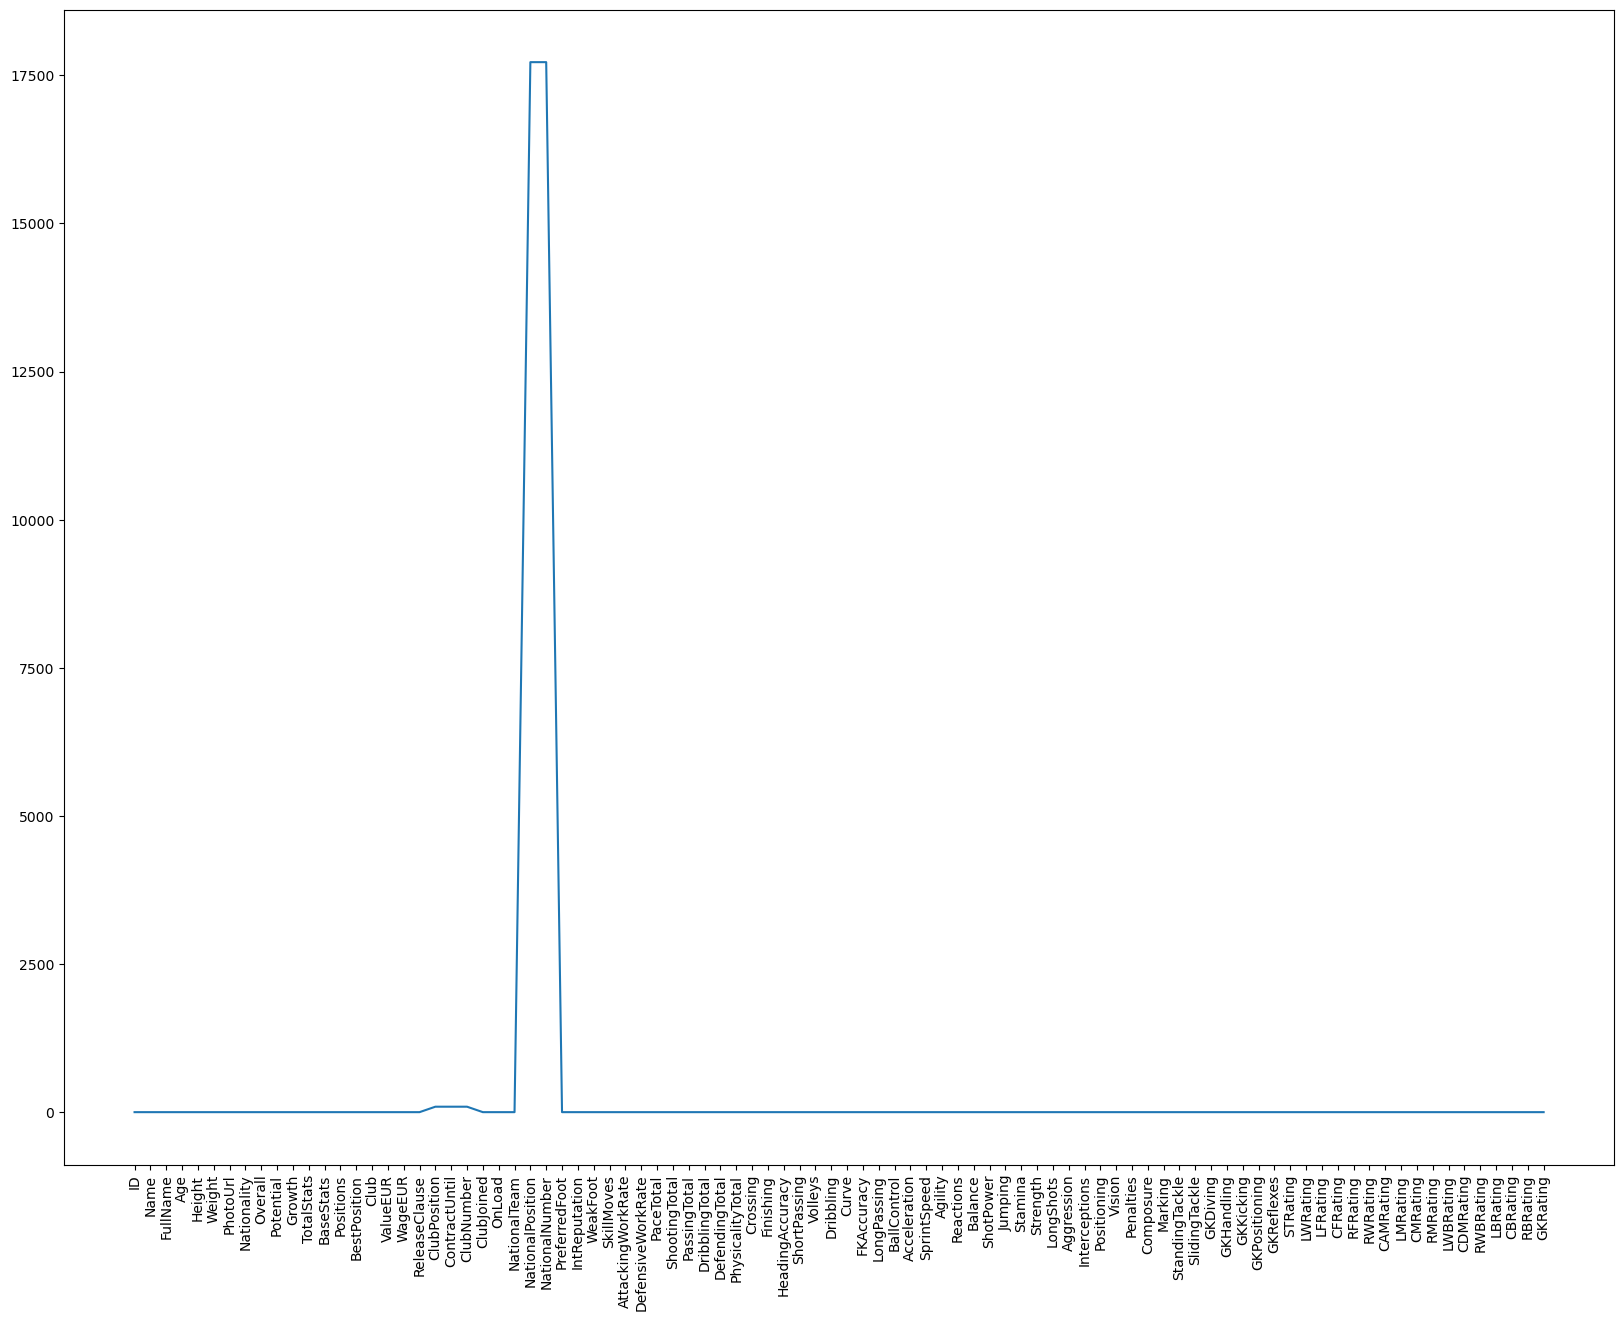

In [5]:
s = df.isnull().sum()
plt.figure(figsize=(20,15))
plt.plot(s.keys(),s.values)
plt.xticks(rotation=90)
plt.show()

# Feature Extraction & Preprocessing

In [6]:
unique_positions = df['BestPosition'].nunique()
positions_list = df['BestPosition'].unique().tolist()

print(f"Number of Unique Positions:{unique_positions}")
print(f"List of Unique Positions:{positions_list}")

Number of Unique Positions:15
List of Unique Positions:['CAM', 'CF', 'ST', 'CM', 'RW', 'GK', 'CB', 'LW', 'CDM', 'LM', 'LB', 'RM', 'RB', 'LWB', 'RWB']


<hr>
Eventhough there are these many positions, a footballer is broadly classified into 4 groups by their play style. They are <b> Forwards[FW], Midfielders[MF], Defenders[DF], Goalkeepers[GK]</b>.<br>
Therefore, the variable <i>BestPosition</i> will be encoded as follows:<br>
<table border="3">
    <tr>
        <th>Encoded Data</th>
        <th>Actual Data</th>
    </tr>
    <tr>
        <td>FW</td>
        <td>ST, LW, RW, CF</td>
    </tr>
    <tr>
        <td>MF</td>
        <td>CM, LM, RM, CAM, CDM</td>
    </tr>
    <tr>
        <td>DF</td>
        <td>CB, LB, RB, RWB, LWB</td>
    </tr>
    <tr>
        <td>GK</td>
        <td>Remains Unchanged</td>
    </tr>
</table>
<hr>

In [7]:
pos_map = {
    "ST":"FW",
    "LW":"FW",
    "RW":"FW",
    "CF":"FW",
    
    "CM":"MF",
    "LM":"MF",
    "RM":"MF",
    "CAM":"MF",
    "CDM":"MF",
    
    "CB":"DF",
    "LB":"DF",
    "RB":"DF",
    "RWB":"DF",
    "LWB":"DF",
    
    "GK":"GK"
}

In [8]:
df["GroupedPosition"] = df["BestPosition"].map(pos_map)
df["GroupedPosition"].describe()

count     18539
unique        4
top          MF
freq       7058
Name: GroupedPosition, dtype: object

In [9]:
df.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

## Extracting Key Attributes

In [10]:
attributes = ['Name','AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking','GKPositioning', 'GKReflexes', 'GroupedPosition']

fifa_df = df[attributes]

In the extracted Attribute set, Attacking & Defending Work Rates are categorical variabels, therefore we encode it for feasibility

In [11]:
wr_map = {"Low":0,"Medium":1,"High":2}
fifa_df["AttackingWorkRate"] = fifa_df["AttackingWorkRate"].map(wr_map)
fifa_df["DefensiveWorkRate"] = fifa_df["DefensiveWorkRate"].map(wr_map)
fifa_df.head()

,Name,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,GroupedPosition
0,L. Messi,0,0,81,89,90,94,34,64,84,...,96,20,35,24,6,11,15,14,8,MF
1,K. Benzema,1,1,80,88,83,87,39,78,75,...,90,43,24,18,13,11,5,5,7,FW
2,R. Lewandowski,2,1,75,91,79,86,44,83,71,...,88,35,42,19,15,6,12,8,10,FW
3,K. De Bruyne,2,2,74,88,93,87,64,77,94,...,89,68,65,53,15,13,5,10,13,MF
4,K. Mbappé,2,0,97,89,80,92,36,76,78,...,88,26,34,32,13,5,7,11,6,FW


In [12]:
fifa_df.to_csv("key_attr_players.csv",index=False)